In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import scipy.integrate as integrate
import scipy.optimize as opt

In [4]:
np.set_printoptions(suppress=True)

# TD5 : Fault detection, hypothesis testing and dignostics
answer given by teacher

## Exercise 3: Preliminaries on statistics


Let $X$ be a random quantity of interest. We know from previous analyses on the random phenomena which we consider that $X$ is normally distributed: $X\sim \mathcal{N}(\mu,\sigma)$. We can collect samples of realisations of size $N$, that is, a vector $\mathbf{x}=(x_1,x_2,...,x_N)$.

1. Assuming that $\mu = 0$ and $\sigma = 2$, generate $n_{samp}=100$ populations of random realisations, of size $N=10$, from $X$.

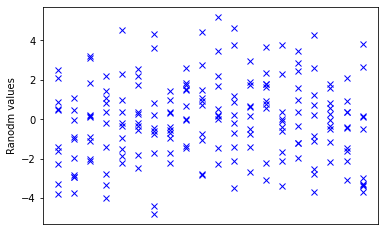

In [5]:
# Sampling from normal distribution
nsize = 100
nsamp = 10 # You can adjust to visualize the effect on the sample mean estimate
sigma = 2
mu = 0

normrv = stat.norm.__call__(loc = mu,scale = sigma) #Freezing random variable with given parameters
y_rnd = normrv.rvs(size=(nsamp,nsize))

plt.plot(y_rnd[:,0:20].T,'xb') # Not all samples for easier visualization
plt.xticks([])
plt.ylabel('Ranodm values')

plt.show()

The following __statistics__ (i.e. functions of the sample points $\mathbf{x}=(x_1,x_2,...,x_N)$) denoted as _sample mean_ and _sample variance_ can be given respectively by:<br>
$S_N=\frac{1}{N}\sum_{i=1}^N{x_i}$<br>
and<br>
$T_{N-1}^2=\frac{1}{N-1}\sum_{i=1}^N{(x_i-S_N)^2}$

2. Compute the $S_N$ and $T_{N-1}^2$ statistics for the $n_{samp}=100$ sampled populations, each composed of $N=20$ points and plot the histogram of these statistics.

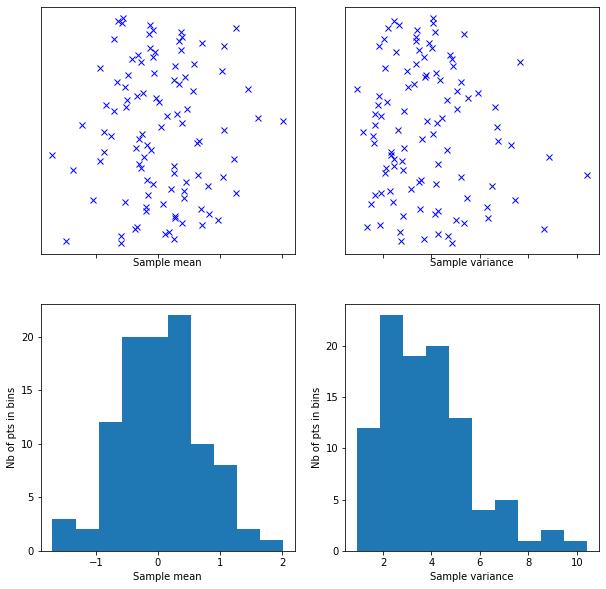

In [6]:
# Computation of statistics for the sampled populations and visualisation of histograms

m_emp = np.sum(y_rnd,axis=0)/np.shape(y_rnd)[0]
s_emp2 = (1/(nsamp-1))*np.sum((y_rnd-m_emp)**2,axis=0)

fig, ax = plt.subplots(2,2,figsize=(10,10),sharex='col')

ax[0,0].plot(m_emp,np.arange(0,nsize,1),'xb',label='sample mean')
ax[0,0].set_yticks([])
ax[0,0].set_xlabel('Sample mean')
ax[0,1].plot(s_emp2,np.arange(0,nsize,1),'xb',label='sample var')
ax[0,1].set_yticks([])
ax[0,1].set_xlabel('Sample variance')
ax[1,0].hist(m_emp)
ax[1,0].set_xlabel('Sample mean')
ax[1,0].set_ylabel('Nb of pts in bins')
ax[1,1].hist(s_emp2)
ax[1,1].set_xlabel('Sample variance')
ax[1,1].set_ylabel('Nb of pts in bins')

plt.show()

It is possible to determine (here for a Gaussian distribution for $X$) the exact distribution of those statistics. It could be shown that:<br>
$S_N \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{N}})$<br>
and<br><br>
$\frac{N-1}{\sigma^2}T_{N-1}^2 \sim \chi^2(N-1)$

3. Plot the PDF of both those distributions and verify that they match with the histograms (for the statistics) plotted in the previous question.

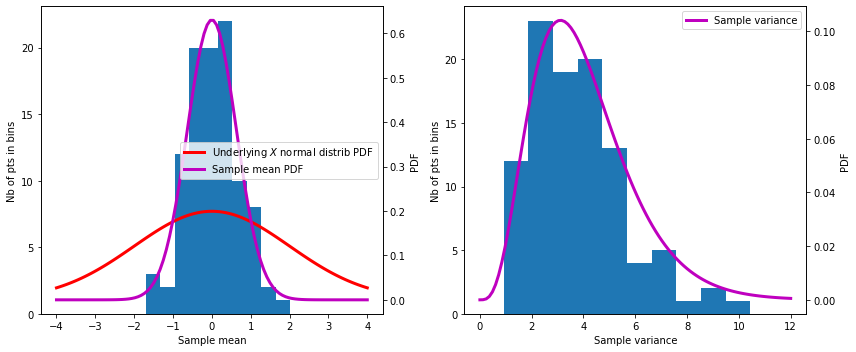

In [7]:
# Computation of the PDF of exact distributions for sample mean and sample variance statistics and comparison
# with simulated populations

Sn = lambda x: stat.norm.pdf(x,loc=mu,scale=sigma/np.sqrt(nsamp))
Tn = lambda x: stat.chi2.pdf(((nsamp-1)/sigma**2)*x,nsamp-1)

xx = np.linspace(mu-2*sigma,mu+2*sigma,100)
xx2 = np.linspace(0,3*sigma**2,100)

fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].hist(m_emp)
ax[0].set_xlabel('Sample mean')
ax[0].set_ylabel('Nb of pts in bins')
ax10 = ax[0].twinx()
ax10.plot(xx,normrv.pdf(xx),'r',lw=3,label='Underlying $X$ normal distrib PDF')
ax10.plot(xx,Sn(xx),'m',lw=3,label='Sample mean PDF')
ax10.legend()
ax10.set_ylabel('PDF')
ax[1].hist(s_emp2)
ax[1].set_xlabel('Sample variance')
ax[1].set_ylabel('Nb of pts in bins')
ax20 = ax[1].twinx()
ax20.plot(xx2,Tn(xx2),'m',lw=3,label='Sample variance')
ax20.legend()
ax20.set_ylabel('PDF')

plt.tight_layout()
plt.show()
# plt.savefig('Fig1.eps',format = 'eps')

4. (Optional): Based on the exact distribution of the sample mean compute the $0.05$ and $0.95$ quantiles and the distribution. What are the lower and upper one-sided confidence intervals for the sample mean (if we were to now the true value $\mu$)? Plot (empirical) confidence intervals for the $n_{samp}=100$ populations and comment.

Theoretical lower bound for alpha = 0.05: -1.04
Theoretical upper bound for alpha = 0.05: 1.04


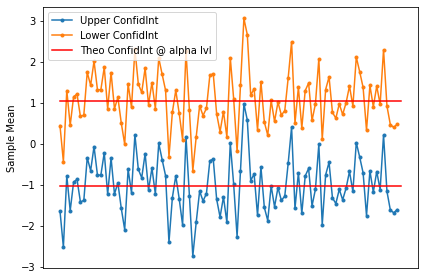

In [8]:
# Confidence intervals on the mean and theoretical alpha level quantile (if mu was known)
lvl = 0.05

normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))

inf_confbound = m_emp-(sigma/np.sqrt(nsamp))*stat.norm.ppf(lvl)
sup_confbound = m_emp-(sigma/np.sqrt(nsamp))*stat.norm.ppf(1-lvl)

plt.plot(sup_confbound,'.-',label='Upper ConfidInt')
plt.plot(inf_confbound,'.-',label='Lower ConfidInt')
plt.plot(np.array([0,nsize]),np.array([1,1])*normrv_Sn.ppf(1-lvl),'-r',label='Theo ConfidInt @ alpha lvl')
plt.plot(np.array([0,nsize]),np.array([1,1])*normrv_Sn.ppf(lvl),'-r')
plt.xticks([])
plt.ylabel('Sample Mean')
plt.legend()
print('Theoretical lower bound for alpha = ' + str(lvl) + ': ' + str(round(normrv_Sn.ppf(lvl),3)))
print('Theoretical upper bound for alpha = ' + str(lvl) + ': ' + str(round(normrv_Sn.ppf(1-lvl),3)))
plt.tight_layout()
plt.show()
# plt.savefig('Fig2.eps',format = 'eps')

## Exercice 3: Fault Detection



We are monitoring an industrial process. This process is producing goods that are sensible to temperature variations. The temperature has to be controlled in order to guarantee the quality of the products. A sensor is providing $N=10$ temperature values for one production shift (half-day = $4$hours). The production process is considered to be viable if the mean temperature on this production shift interval does not deviate significantly from a reference value of $\mu_0=0^\circ C$. <br>

Let us assume that at any point in time, the temperature value follows a normal distribution $X\sim \mathcal{N}(\mu_t,\sigma)$. We will use the sample mean $S_N$ or $\bar{X}$ as an indicator of the good functioning of the production process. We need to set up alarm levels of fault detection thresholds based on this metric. <br>

The reference values for the monitored random phenomena are $\mu_0 = 0$ and $\sigma=2$, i.e. $X\sim\mathcal{N}(0,2)$.

1. If we use the sample mean as a decision metric and samples of size $N=10$ (see Exercise 0 for the exact distribution of the sample mean), and if we want to determine an alarm level for temperatures that may be too elevated, what alarm level should we consider if we want no more than probability $\alpha=0.05$ of false alarms ?

In [9]:
# Computation of the alarm bound based on the sample mean
nsamp = 10
sigma = 2
mu = 0

lvl = 0.05

normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))

al_bound = normrv_Sn.ppf(1-lvl)

print('Alarm bound for alpha = ' + str(lvl) + ' : ' + str(round(al_bound,3))+'°C')

Alarm bound for alpha = 0.05 : 1.04°C


2. Plot the PDF of the decision metric and the (upper) alarm level corresponding to probability $\alpha=0.05$ of false alarms.

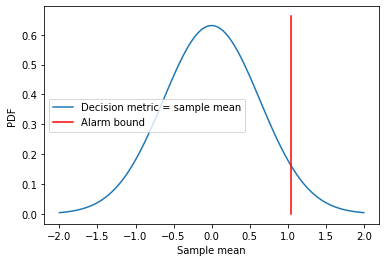

In [10]:
# Visualisation of the normal operation mode (random sample mean based on reference mean mu) and alarm bound
xx = np.linspace(mu-1*sigma,mu+1*sigma,100)

plt.plot(xx,normrv_Sn.pdf(xx),label='Decision metric = sample mean')
plt.plot(np.array([1,1])*al_bound,np.array([0,plt.ylim()[1]]),'r',label = 'Alarm bound')
plt.ylabel('PDF')
plt.xlabel('Sample mean')
plt.legend()
plt.show()

3.Generate $n_{samp}=100$ points from the sample mean distribution (with underlying random phenomena $X\sim\mathcal{N}(0,2)$) and count (empirically) the number of healthy samples and the number of false alarms.

Alarm bound for alpha = 0.05 : 1.04°C
Number of false alarms : 5 (we known that they are taken here from the healty distribution, so they are indeed false alarms)
Number of identified healthy samples : 95


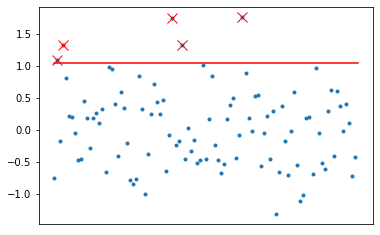

In [11]:
# Visualisation of false alarms (indeed they have been sample for the healthy random process)
nsize = 100

idx = np.arange(nsize)
y_rnd = normrv_Sn.rvs(size=nsize)

print('Alarm bound for alpha = ' + str(lvl) + ' : ' + str(round(al_bound,3))+'°C')
print('Number of false alarms : ' + str(np.sum(y_rnd>al_bound)) + ' (we known that they are taken here from '\
        'the healty distribution, so they are indeed false alarms)')
print('Number of identified healthy samples : ' +str(nsize-np.sum(y_rnd>al_bound)))

plt.plot(y_rnd,'.')
plt.plot(idx[y_rnd>al_bound],y_rnd[y_rnd>al_bound],'xr',ms = 10)
plt.plot(np.array([0,1])*nsize,np.array([1,1])*al_bound,'r')
plt.xticks([])
plt.show()

Now let us assume that we can propose a model for the failure mode of the temperature control system. Let us assume that if this control system fails, the temperature will rise to a new mean level $\mu_1=2^\circ C$. This means that temperature samples we might obtain from a failed production process will be described by $X\sim\mathcal{N}(2,2)$.

4. Plot both the PDF corresponding to the decision metric (sample mean for samples of size $N=10$) for a system respectively in failure mode and healthy mode. If we keep the same alarm level as the one calculated in question 1, compute (empirically) the number of false alarms as well as non-detected failures. Use $n_{samp}=100$ point for this empirical estimation.

Number of false alarms : 5
Number of correctly identified healthy samples : 95
Number of correctly identified faulty samples : 87
Number of non-detected failures : 13


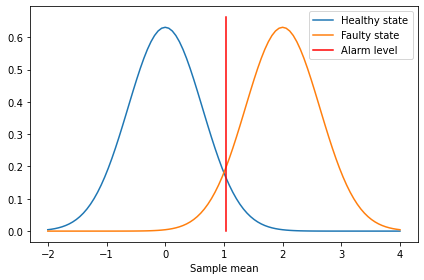

In [13]:
# Visualisation of healthy and faulty distribtution for the decision metric
# Computation of empirical number of false alarms and non-detected failures

mu1 = 2
xx = np.linspace(mu-1*sigma,mu1+1*sigma,100)

normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))
normrv_Sn1 = stat.norm.__call__(loc = mu1,scale = sigma/np.sqrt(nsamp))

y_rnd = normrv_Sn.rvs(size=nsize)
y_rnd1 = normrv_Sn1.rvs(size=nsize)

print('Number of false alarms : ' + str(np.sum(y_rnd>al_bound)))
print('Number of correctly identified healthy samples : ' + str(np.sum(y_rnd<al_bound)))
print('Number of correctly identified faulty samples : ' + str(np.sum(y_rnd1>al_bound)))
print('Number of non-detected failures : ' + str(np.sum(y_rnd1<al_bound)))

plt.plot(xx,normrv_Sn.pdf(xx),label='Healthy state')
plt.plot(xx,normrv_Sn1.pdf(xx),label='Faulty state')
plt.plot(np.array([1,1])*al_bound,np.array([0,plt.ylim()[1]]),'r',label = 'Alarm level')
plt.xlabel('Sample mean')
plt.legend()

plt.tight_layout()
# plt.savefig('Fig3.eps',format = 'eps')
plt.show()

5. Give both the empirical and exact confusion matrix corresponding to a decision metric based on the sample mean and considering that the considered hypotheses to be tested are:<br>
	$H_0:X\sim\mathcal{N}(\mu_0,\sigma)$<br>
	$H_1:X\sim\mathcal{N}(\mu_1,\sigma)$

In [14]:
# Empirical and exact confusion matrices (using pandas)
df1 = pd.DataFrame([[np.sum(y_rnd<al_bound),np.sum(y_rnd1<al_bound)],\
                    [np.sum(y_rnd>al_bound),np.sum(y_rnd1>al_bound)],\
                    [nsize, nsize]],\
                   index = ['decision H_0','decision H_1','total'],columns=['True H_0','True H_1'])

print('Confusion matrix (empirical)')
print(df1)
print('')

df2 = pd.DataFrame([[normrv_Sn.cdf(al_bound)*100,normrv_Sn1.cdf(al_bound)*100],\
                    [(1-normrv_Sn.cdf(al_bound))*100,(1-normrv_Sn1.cdf(al_bound))*100],\
                    [nsize, nsize]],\
                   index = ['decision H_0','decision H_1','total'],columns=['True H_0','True H_1'])

print('Confusion matrix (Theoretical)')
print(df2)

Confusion matrix (empirical)
              True H_0  True H_1
decision H_0        95        13
decision H_1         5        87
total              100       100

Confusion matrix (Theoretical)
              True H_0    True H_1
decision H_0      95.0    6.457983
decision H_1       5.0   93.542017
total            100.0  100.000000


6. Study the evolution of the probability of false alarms and non-detection as a function of the alarm level. Plot both curves.

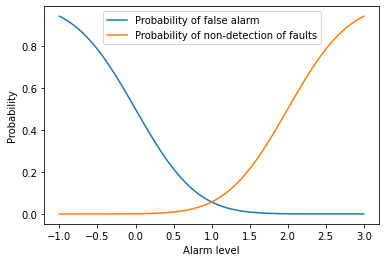

In [15]:
# Evolution of probability of false alarm and non detection with the decision bound
var_al = np.linspace(-1,3,100)

plt.plot(var_al,1-normrv_Sn.cdf(var_al),label='Probability of false alarm')
plt.plot(var_al,normrv_Sn1.cdf(var_al),label='Probability of non-detection of faults')
plt.xlabel('Alarm level')
plt.ylabel('Probability')
plt.legend()
plt.show()

7. Plot the so-called Receiver Operating Characteristic (ROC) curve by drafting the proportion of false positives (x-axis) against the proportion of true positives (y-axis).

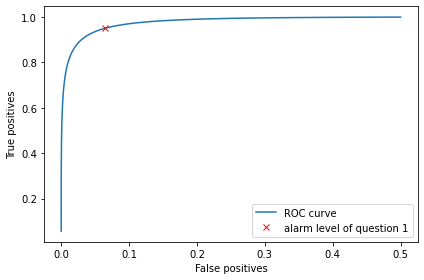

In [16]:
# ROC curve
var_al = np.linspace(-1,2,100)

plt.plot(normrv_Sn1.cdf(var_al),normrv_Sn.cdf(var_al),label = 'ROC curve')
plt.plot(normrv_Sn1.cdf(al_bound),normrv_Sn.cdf(al_bound),'xr',label='alarm level of question 1')
plt.xlabel('False positives')
plt.ylabel('True positives')
plt.legend()

plt.tight_layout()
# plt.savefig('Fig4.eps',format = 'eps')
plt.show()

We now assume that we monitor the evolution of the production process on $20$ shifts (20 half-days) and that the temperature control system is slowly degrading. At time $t=20$ shifts, the mean $\mu_{t=20}$ has reached $2^\circ C$, according to a linear evolution.

8. Draw samples of size $N=10$ for each date $t \in [0,20]$, plot them and apply the test using the (upper) alarm level calculated above for each date.

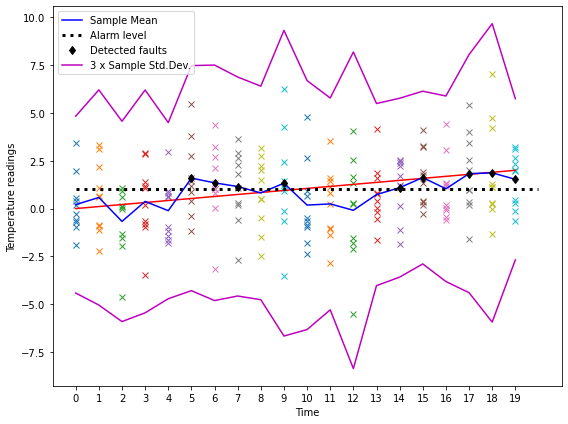

In [17]:
# Visualisation of the evolution of the mean and of several tests in time

nsize = 20
nsamp = 10
lvl = 0.05
popS = np.zeros((nsamp,nsize))
mut = np.linspace(0,2,nsize)

normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))

plt.figure(figsize = (8,6))
for i in range(nsize):
    popS[:,i]=stat.norm.rvs(loc = mut[i],scale = sigma, size = nsamp)
    plt.plot(i*np.ones(nsamp),popS[:,i],'x')
    
m_emp = np.sum(popS,axis=0)/np.shape(popS)[0]
s_emp2 = (1/(nsamp-1))*np.sum((popS-m_emp)**2,axis=0)

plt.plot(mut,'r')
plt.plot(m_emp,'b',label = 'Sample Mean')
plt.plot(np.array([0,nsize]),np.array([1,1])*normrv_Sn.ppf(1-lvl),':k',lw = 3,label = 'Alarm level')
plt.plot(np.arange(0,nsize,1)[m_emp>normrv_Sn.ppf(1-lvl)],m_emp[m_emp>normrv_Sn.ppf(1-lvl)],'dk',\
        label = 'Detected faults')
plt.plot(m_emp+3*np.sqrt(s_emp2),'m',label = '3 x Sample Std.Dev.')
plt.plot(m_emp-3*np.sqrt(s_emp2),'m')
plt.xticks(range(20))
plt.ylabel('Temperature readings')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
# plt.savefig('Fig5.eps',format = 'eps')
# plt.show()


9. (Optional) Compute the so-called p-values at each date and make a plot of their evolution with the degradation of the process.

In [ ]:
# Calculation of p-values

plt.plot(1-normrv_Sn.cdf(m_emp),'.-')
plt.ylabel('p-value')
plt.xlabel('Time')
plt.xticks(range(20))

plt.tight_layout()
# plt.savefig('Fig6.eps',format = 'eps')
plt.show()

## Exercise 4


We monitor two variables $X=(X_1,X_2)$. We assume that we have a model for normal functioning of the considered system, namely $Pr(X|H_0)$ and a model for an abnormal state $Pr(X|H_1)$. Parameters for the $H_0$ and $H_1$ hypothesis are given by: <br>

$\mu_0 = \left[\begin{array}{c} -1 \\ -1  \end{array}\right]$ and $\sigma_0 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1  \end{array}\right]$ and $\mu_1 = \left[\begin{array}{c} 1 \\ 1  \end{array}\right]$ and $\sigma_1 = \left[\begin{array}{cc} 1 & -0.5 \\ -0.5 & 1  \end{array}\right]$

1. Generate $1000$ samples for both the healthy and faulty states. Plot them along with the the different PDF (in the space defined by $(X_1,X_2)$). Use contour plots.

2. Compute the optimal decision boundary according to Neyman-Pearson $\lambda_{np}=1$ and represent this decision boundary in the sample space.

3. Classify the generated samples according to the decision boundary and give the confusion matrix.

4. Repeat the questions 1 to 3 with the following parameters:
	
$\mu_0 = \mu_1 = \left[\begin{array}{c} 0 \\ 0  \end{array}\right]$ and $\sigma_0 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1  \end{array}\right]$ and $\sigma_1 = \left[\begin{array}{cc} 5 & 0 \\ 0 & 5  \end{array}\right]$

5. Repeat the questions 1 to 3 with the following parameters:
	
$\mu_0 = \left[\begin{array}{c} -1 \\ -1  \end{array}\right]$ and  $\mu_1 = \left[\begin{array}{c} 1 \\ 1  \end{array}\right]$ and $\sigma_0 = \sigma_1 = \left[\begin{array}{cc} 1 & -0.5 \\ -0.5 & 1  \end{array}\right]$

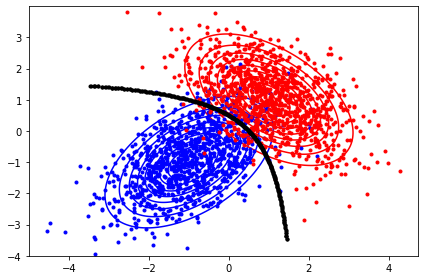

Boundary 1
              True H_0  True H_1
decision H_0       911        42
decision H_1        89       958
total             1000      1000
Boundary 2
              True H_0  True H_1
decision H_0       966       144
decision H_1        34       856
total             1000      1000
Definition of confusion matrix
             True H_0 True H_1
decision H_0       TP       FP
decision H_1       FN       TN


In [18]:
# Visualisation of the decision boundary based on the Neyman-Pearson test (ratio of likelihood)

nsize = 1000

# Values for question 1
mnormrv1 = stat.multivariate_normal.__call__(mean = [-1,-1],cov = [[1,0.5],[0.5,1]])
mnormrv2 = stat.multivariate_normal.__call__(mean = [1,1],cov = [[1,-0.5],[-0.5,1]])

# Values for question 4
# mnormrv1 = stat.multivariate_normal.__call__(mean = [0,0],cov = [[1,0],[0,1]])
# mnormrv2 = stat.multivariate_normal.__call__(mean = [0,0],cov = [[5,0],[0,5]])

# Values for question 5
# mnormrv1 = stat.multivariate_normal.__call__(mean = [-1,-1],cov = [[1,0],[0,1]])
# mnormrv2 = stat.multivariate_normal.__call__(mean = [1,1],cov = [[1,0],[0,1]])

x, y = np.mgrid[-4:4:0.01,-4:4:0.01]
pos = np.dstack((x, y))

y_rnd1 = mnormrv1.rvs(size=nsize)
y_rnd2 = mnormrv2.rvs(size=nsize)

pdf1 = mnormrv1.pdf(pos)
pdf2 = mnormrv2.pdf(pos)

deciscrit = lambda x: mnormrv1.pdf(x)/mnormrv2.pdf(x)
lbddec = 1 # you can play with this decision boundary
lbddec2 = 0.2 # this is a second decision boundary (with a different lambda value)

plt.contour(x,y,mnormrv1.pdf(pos),10,colors = 'blue')
plt.contour(x,y,mnormrv2.pdf(pos),10,colors = 'red')
plt.plot(y_rnd1[:,0],y_rnd1[:,1],'.b')
plt.plot(y_rnd2[:,0],y_rnd2[:,1],'.r')
plt.plot(pos[(pdf1/pdf2<=(lbddec*1.02)) & (pdf1/pdf2>=(lbddec)) & (pdf1>10**-6),0],\
         pos[(pdf1/pdf2<=(lbddec*1.02)) & (pdf1/pdf2>=(lbddec)) & (pdf1>10**-6),1],'k.',lw = 4,\
         label='lnp = 1')
# plt.plot(pos[(pdf1/pdf2<=(lbddec2*1.01)) & (pdf1/pdf2>=(lbddec2)) & (pdf1>10**-6),0],\
#          pos[(pdf1/pdf2<=(lbddec2*1.01)) & (pdf1/pdf2>=(lbddec2)) & (pdf1>10**-6),1],'m-.',lw = 4)


val1 = np.sum(deciscrit(y_rnd1[0:nsize,:])>lbddec)
val2 = np.sum(deciscrit(y_rnd2[0:nsize,:])>lbddec)
val12 = np.sum(deciscrit(y_rnd1[0:nsize,:])>lbddec2)
val22 = np.sum(deciscrit(y_rnd2[0:nsize,:])>lbddec2)

df1 = pd.DataFrame([[val1,val2],[nsize-val1,nsize-val2],[nsize, nsize]],\
                   index = ['decision H_0','decision H_1','total'],columns=['True H_0','True H_1'])
df2 = pd.DataFrame([[val12,val22],[nsize-val12,nsize-val22],[nsize, nsize]],\
                   index = ['decision H_0','decision H_1','total'],columns=['True H_0','True H_1'])
df3 = pd.DataFrame([['TP','FP'],['FN','TN']],\
                   index = ['decision H_0','decision H_1'],columns=['True H_0','True H_1'])

plt.tight_layout()
# plt.savefig('Fig9.eps',format = 'eps')
plt.show()

print('Boundary 1')
print(df1)
print('Boundary 2')
print(df2)
print('Definition of confusion matrix')
print(df3)

In [ ]:
# normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))
# normrv2_Sn = stat.norm.__call__(loc = mu2,scale = sigma/np.sqrt(nsamp))

# # lbdratio = lambda x: np.abs(normrv2_Sn.pdf(x)/normrv_Sn.pdf(x)-1)
# lbdratio = lambda x: np.abs(np.log(normrv2_Sn.pdf(x))-np.log(normrv_Sn.pdf(x)))

# x0 = normrv_Sn.cdf(normrv_Sn.ppf(1-lvl))
# sol = opt.minimize(lbdratio,x0,options={'disp': False})
# lnp = sol.x[0]

# lbdratio2 = lambda x: np.abs(np.log(stat.norm.pdf(x,loc = mu,scale = sigma/np.sqrt(nsamp*2)))\
#                             -np.log(stat.norm.pdf(x,loc = mu2,scale = sigma/np.sqrt(nsamp*2))))
# x0 = normrv_Sn.cdf(stat.norm.ppf(1-lvl,loc = mu,scale = sigma/np.sqrt(nsamp)))
# sol = opt.minimize(lbdratio2,x0,options={'disp': False})
# lnp2 = sol.x[0]

In [ ]:
# Visualisation of a posteriori probability with given prior on H0 and H1
# nsize = 30
# nsamp = 10
# mu = 0
# mu2 = 1
# sigma = 1

# normrv = stat.norm.__call__(loc = mu,scale = sigma)
# normrv2 = stat.norm.__call__(loc = mu2,scale = sigma)
# normrv_Sn = stat.norm.__call__(loc = mu,scale = sigma/np.sqrt(nsamp))
# normrv_Sn2 = stat.norm.__call__(loc = mu2,scale = sigma/np.sqrt(nsamp))

# y_rnd = normrv.rvs(size=(nsamp,nsize))
# y_rnd2 = normrv2.rvs(size=(nsamp,nsize))

# m_emp = np.sum(y_rnd,axis=0)/np.shape(y_rnd)[0]
# m_emp2 = np.sum(y_rnd2,axis=0)/np.shape(y_rnd)[0]

# # Prior values for the different hypothesis
# lNP = 3 # where lNP = L1(x)/L0(x) to substitute in Bayes relation p0L0(x)/(p0L0(x)+(1-p0)L1(x))
# p0 = lNP/(1+lNP)
# p1 = 1-p0
# # p0 = 0.8
# # p1 = 0.2
# print('p0= '+ str(p0),', p1 =' +str(p1))

# p_post = lambda x: (p0*normrv_Sn.pdf(x))/(p0*normrv_Sn.pdf(x)+(p1*normrv_Sn2.pdf(x)))

# xtest = m_emp

# fig, ax = plt.subplots(1,2,figsize=(10,6))
# ax[0].plot(p_post(xtest),'.-',label='p(H0/x,p0,p1)')
# ax[0].plot(np.array([0,nsize]),np.array([1,1])*p0,'r')
# ax[0].legend()
# ax[0].set_title('Bayesian perspective')
# ax[1].plot(1-normrv_Sn.cdf(xtest),'.-',label='P(x/H0)')
# ax[1].plot(normrv_Sn2.cdf(xtest),'.-',label='P(x/H1)')
# ax[1].legend()
# ax[1].set_title('Classical perspective')
# plt.show()


In [ ]:
# gampar1 = 10
# gampar2 = 0.5
# nsize = 2000

# gamrv = stat.gamma.__call__(a = gampar1,scale = gampar2)
# y_rnd = gamrv.rvs(size=nsize)
# # y_rnd = stat.gamma.rvs(a=gampar1,scale=gampar2,size=nsize)
# q95 = stat.scoreatpercentile(y_rnd,95)
# q5 = stat.scoreatpercentile(y_rnd,5)
# # q95th = stat.gamma.ppf(0.95,a=10,scale=0.5)
# q95th = gamrv.ppf(0.95)
# print('Empirical 95 quantile', str(round(q95,3)))
# print('Theoritical 95 quantile', str(round(q95th,3)))
# print('Percentage of points above theo 90%: ' + str(round(np.sum(y_rnd>gamrv.ppf(0.9))/nsize*100,3))+'%')

# fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
# ax[0].plot(y_rnd,range(len(y_rnd)),'.')
# ax[0].plot(np.array([1,1])*q95,np.array([0,nsize]),'r')
# ax[0].plot(np.array([1,1])*q95th,np.array([0,nsize]),':r')
# ax[0].set_yticks([])
# ax[1].hist(y_rnd)
# plt.show()